In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split



In [4]:
crime_df = pd.read_csv("crime_data.csv")
crime_df.head()

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


<Axes: >

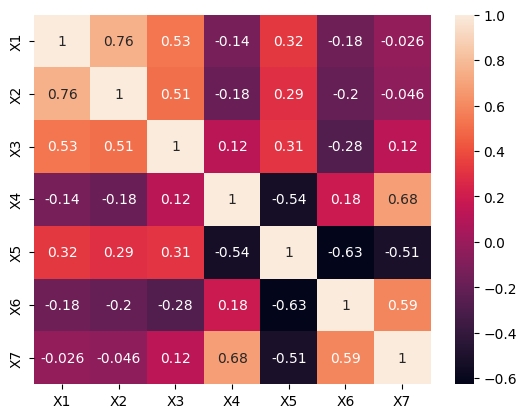

In [5]:
# for multiple linear regression (and other models) we need to use variables
# that are correlated with the outcome BUT as uncorrelated with each other as possible
# in our equation

correlation = crime_df.corr()
sns.heatmap(correlation, annot = True)

# is there anything here that is correlated with something other than X1 (what 
# were trying to predict) pretty strongly? 
# x4 and x7 have a pretty high correlation. if we used those to predict x1, 
# they would cause multicollinearity

In [10]:
y = crime_df['X1']
X = crime_df[['X2','X5']]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
"""
LinearRegression is a class and we are creating an instance (instantiating) 
that class
"""

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = regression.predict(X_test) 
y_pred

array([762.85812777, 892.35981193, 749.27052915, 895.45614362,
       503.48965345, 890.21757946, 667.12167926, 711.4891275 ,
       733.57097117, 521.30117078, 498.2672238 , 577.86033169,
       711.39431635, 463.32799351, 673.77226389])

In [11]:
accuracy_score = regression.score(X_test, y_test)
accuracy_score

0.2959051814167827

In [12]:
regression.coef_

array([0.365106  , 4.50835216])

In [13]:
#what is the equation for this model?
# x1 = .37*x2 + 4.51*x5

# OLS Regression

OLS (Ordinary least squares) regression is a type of linear regression that lets you handle interactions as well as features that dont have interactions. With OLS regression you can incorporate features that are correlated with each other. 

In [14]:
%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 14.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
from statsmodels.formula.api import ols
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
diabetes_df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [18]:
diabetes_vs_insulin = ols("Outcome ~ Insulin", data = diabetes_df).fit()
print(diabetes_vs_insulin.params)
# outcome = .000540*insulin + .305844
# OLS regression (or any type or regression weve talked about) doesnt make sense 
# to use for a binary outcome problem (or any discrete outcome problem)

Intercept    0.305844
Insulin      0.000540
dtype: float64


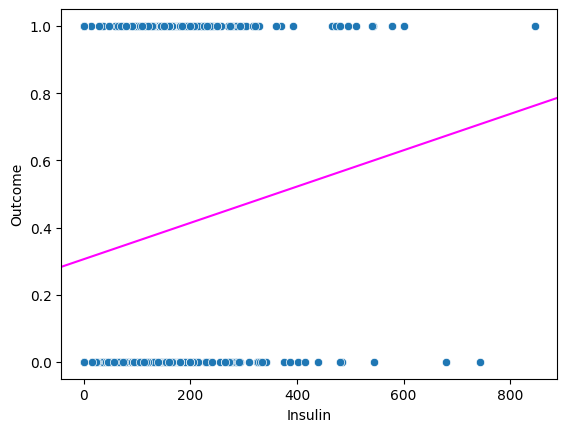

In [20]:
intercept, slope = diabetes_vs_insulin.params
sns.scatterplot(x='Insulin',
                y='Outcome',
                data=diabetes_df)
plt.axline(xy1=(0,intercept), slope = slope, color = 'magenta')

In [22]:
#OLS works best when we have a gradient of ourcomes were trying to predict (continuous data) 
# BUT we can use logistic regression to predict binary outcomes
# These are just examples of how the code works but the outcomes are meaningless.
# no interaction between two variables - low or no correlation between the parameters
# used to predict the outcome

age_gl_no_int = ols('Outcome ~ Age + Glucose', data = diabetes_df).fit()
print(age_gl_no_int.params)
# Outcome = -.6 + .005*Age + .006*Glucose

Intercept   -0.600748
Age          0.005030
Glucose      0.006473
dtype: float64


In [23]:
# with interaction - there is a correlation between params used to predict the outcome
age_gl_int = ols('Outcome ~ Age*Glucose', data=diabetes_df).fit()
print(age_gl_int.params)
# Outcome = -.9 + .014*Age + .009*Glucose + -.00007*Age*Glucose 

Intercept     -0.905058
Age            0.014172
Glucose        0.008923
Age:Glucose   -0.000072
dtype: float64
